# <b> JPMC Team #1: Company Relationship Analysis Tool </b>

In [1]:
import os
import pandas as pd

In [2]:
#filename = "/Users/annahauk/Desktop/Machine Learning/SP500AdjPrice.csv"
filename = os.path.join(os.getcwd(), "SP500AdjPrice.csv")
df = pd.read_csv(filename, header = 0)

In [3]:
data    = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S%26P_500_component_stocks')
table_symbol   = data[0]
table_industry = data[0]['GICS Sector']

#these 2 lists are in order with one another
symbols = list(table_symbol.Symbol.values)
industries = list(table_industry.values) ##Industry Sector

remove = []

symbols_to_remove = ['BF.B', 'BRK.B', 'KVUE', 'VLTO','SPY']

for i, symbol in enumerate(symbols):
    if symbol in symbols_to_remove:
        remove.append(i)
#print(remove)

#list(set(industries))

for i in remove:
    symbols.remove(symbols[i])
    industries.remove(industries[i])

#print(len(symbols))
#print(set(industries))

symbol_industry = dict(zip(symbols,industries))

df_industries = pd.DataFrame({'Industry': [symbol_industry[symbol] for symbol in symbols]})
df_industries.index = symbol_industry.keys()
df_industries = df_industries.sort_index()
df_industries.head(10)

#for i in industries:
    

,Industry
A,Materials
AAL,Real Estate
AAPL,Information Technology
ABBV,Health Care
ABNB,Information Technology
ABT,Health Care
ACGL,Communication Services
ACN,Information Technology
ADBE,Industrials
ADI,Information Technology


In [4]:
a = len(symbols)

df.index = sorted(symbols)
df = df.drop(columns = "Unnamed: 0", axis = 1)

In [5]:
df.head()

,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20
A,140.885956,143.133453,142.437317,139.553360,140.120193,138.161102,134.968872,135.933502,137.634033,133.288239,136.062790,132.442917,133.795410
AAL,16.120001,16.360001,16.120001,16.360001,16.590000,15.880000,15.460000,14.850000,14.660000,13.860000,14.120000,13.980000,13.960000
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612
ABBV,151.295471,152.941910,152.177490,149.874420,146.610977,144.405930,146.718781,148.914017,150.776062,150.981857,152.197098,151.138672,153.000702
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002


In [6]:
dictionary = dict(zip(symbols,industries))

## Don't need this -- use dataframe instead of dictionary

In [7]:
b = []
unique_industries = list(set(dictionary.values()))
#for i in unique_industries:
    #print(i)
# Initialize lists within the list for each unique industry
for _ in unique_industries:
    b.append([])

# Append companies to their respective industry lists
for key, value in dictionary.items():
    index = unique_industries.index(value)
    b[index].append(key)

* Consumer Discretionary = 0
* Information Technology = 1
* Materials = 2
* Real Estate = 3
* Utilities = 4
* Financials = 5
* Communication Services = 6
* Industrials = 7
* Energy = 8
* Consumer Staples = 9
* Health Care = 10

# <b> <font color = #f6308e > Percentage Price Change Per Day </b> 

In [8]:
df_price = df.T
df_price_pct = df_price.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Adj Close 2023-03-03,0.015953,0.014888,0.035090,0.010882,0.027374,0.017734,0.005642,0.014853,0.031604,0.008993,...,0.021339,0.011812,0.012657,0.028132,0.016332,0.007693,0.026262,0.011076,0.019044,0.011745
Adj Close 2023-03-06,-0.004864,-0.014670,0.018539,-0.004998,0.004772,-0.016276,0.005610,0.001597,0.008662,-0.003919,...,-0.003712,-0.000768,0.008865,0.013681,-0.003368,-0.002853,-0.012676,-0.011763,-0.009547,-0.005218
Adj Close 2023-03-07,-0.020247,0.014888,-0.014497,-0.015134,0.004829,-0.026959,-0.009902,-0.020139,-0.006397,-0.003126,...,-0.019411,-0.022137,-0.019331,-0.017316,-0.013517,-0.018407,-0.011796,-0.011935,-0.047580,-0.015560
Adj Close 2023-03-08,0.004062,0.014059,0.008377,-0.021775,-0.015283,-0.005801,-0.009861,-0.002044,0.003016,0.008814,...,0.003358,0.012419,-0.014604,-0.016585,-0.003915,-0.001103,-0.010069,0.016250,0.005168,0.009639
Adj Close 2023-03-09,-0.013982,-0.042797,-0.014915,-0.015040,-0.041280,-0.015594,-0.027173,-0.014792,-0.021600,-0.016133,...,-0.034437,-0.002329,-0.007729,-0.022661,-0.012676,-0.005758,0.003609,-0.033087,-0.113967,-0.006819


In [9]:
df_price_pct.T.isnull().any()

Adj Close 2023-03-03    False
Adj Close 2023-03-06    False
Adj Close 2023-03-07    False
Adj Close 2023-03-08    False
Adj Close 2023-03-09    False
Adj Close 2023-03-10    False
Adj Close 2023-03-13    False
Adj Close 2023-03-14    False
Adj Close 2023-03-15    False
Adj Close 2023-03-16    False
Adj Close 2023-03-17    False
Adj Close 2023-03-20    False
dtype: bool

# <b> <font color = #56beba > Correlations Between Stocks </b> 

In [10]:
price_corr = df_price_pct.corr()
price_corr.head()

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,0.518884,0.791646,0.374019,0.633630,0.810017,0.844036,0.907142,0.633080,0.872986,...,0.769744,0.302473,0.665964,0.743984,0.842873,0.723940,0.581283,0.822347,0.232826,0.829995
AAL,0.518884,1.000000,0.363977,-0.151065,0.736561,0.168846,0.642950,0.615690,0.609986,0.667913,...,0.739896,-0.394522,0.452224,0.273454,0.530967,0.064474,0.102182,0.648352,0.545734,0.338238
AAPL,0.791646,0.363977,1.000000,0.431610,0.610113,0.781189,0.553827,0.815994,0.691611,0.642086,...,0.712923,0.532876,0.515754,0.803460,0.644941,0.761709,0.446678,0.716757,0.305478,0.782668
ABBV,0.374019,-0.151065,0.431610,1.000000,0.339878,0.705050,0.322698,0.290109,0.224160,0.327988,...,0.359326,0.294439,0.311518,0.674333,0.404990,0.548515,0.709122,0.218784,0.018602,0.133277
ABNB,0.633630,0.736561,0.610113,0.339878,1.000000,0.482641,0.751249,0.783877,0.845854,0.700262,...,0.805317,-0.174714,0.398855,0.569476,0.545922,0.349104,0.265397,0.693478,0.571563,0.435598


In [11]:
import seaborn as sns
import matplotlib.pyplot as pltq

In [12]:
set(industries)

{'Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities'}

In [13]:
df = df.join(df_industries)

# <b> <font color = #f6308e > Information Technology </b> 

In [15]:
condition = df[df['Industry'] == 'Information Technology']
condition
#companies with IT as its industry 


,Adj Close 2023-03-02,Adj Close 2023-03-03,Adj Close 2023-03-06,Adj Close 2023-03-07,Adj Close 2023-03-08,Adj Close 2023-03-09,Adj Close 2023-03-10,Adj Close 2023-03-13,Adj Close 2023-03-14,Adj Close 2023-03-15,Adj Close 2023-03-16,Adj Close 2023-03-17,Adj Close 2023-03-20,Industry
AAPL,145.511978,150.617996,153.410370,151.186447,152.452972,150.179184,148.094894,150.059525,152.173737,152.572647,155.424850,154.577164,156.970612,Information Technology
ABNB,122.379997,125.730003,126.330002,126.940002,125.000000,119.839996,118.300003,115.959999,116.360001,113.580002,119.989998,118.150002,118.400002,Information Technology
ACN,262.179596,266.073822,266.498810,261.131866,260.598175,256.743469,250.012512,248.391556,249.547958,243.311264,249.982880,247.096771,249.617157,Information Technology
ADI,182.840942,184.485214,183.762131,183.187622,184.802185,181.820694,180.037750,180.820267,184.812088,181.196655,184.861603,184.089005,185.287537,Information Technology
ADM,79.668991,80.153519,80.489716,78.838394,79.016388,77.117851,75.802727,76.356468,78.067108,75.951042,75.614845,73.429565,76.069702,Information Technology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRV,180.066788,180.459961,180.224060,177.294861,174.739182,171.853867,173.592957,170.174072,169.719543,164.512146,170.164200,163.069489,166.705780,Information Technology
TSLA,190.899994,197.789993,193.809998,187.710007,182.000000,172.919998,173.440002,174.479996,183.259995,180.449997,184.130005,180.130005,183.250000,Information Technology
VLTO,180.471634,181.716476,179.047546,176.498123,178.181152,173.351181,168.590912,165.294571,166.818253,162.137680,165.523636,160.355072,162.595779,Information Technology
WDC,38.380001,38.590000,37.779999,37.310001,37.900002,37.060001,36.060001,35.320000,35.290001,34.389999,35.340000,35.080002,35.200001,Information Technology


df_price = df.T
df_price_pct = df_price.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct.head()
price_corr = df_price_pct.corr()
price_corr.head()

,AAPL,ABNB,ACN,ADI,ADM,AJG,AME,AMP,ANSS,AWK,...,SYF,TEL,TFC,TFX,TGT,TRV,TSLA,VLTO,WDC,ZBRA
Adj Close 2023-03-03,0.035090,0.027374,0.014853,0.008993,0.006082,0.010748,0.011170,0.011822,0.009333,0.009693,...,0.017907,0.010376,0.016264,0.014936,0.000362,0.002183,0.036092,0.006898,0.005472,0.011076
Adj Close 2023-03-06,0.018539,0.004772,0.001597,-0.003919,0.004194,0.009787,-0.003682,-0.003479,-0.005381,-0.016146,...,-0.021166,0.001073,-0.002163,-0.023120,-0.004819,-0.001307,-0.020122,-0.014687,-0.020990,-0.011763
Adj Close 2023-03-07,-0.014497,0.004829,-0.020139,-0.003126,-0.020516,-0.009692,-0.023152,-0.018910,-0.023939,-0.014415,...,-0.026959,-0.013474,-0.044647,-0.014038,-0.014407,-0.016253,-0.031474,-0.014239,-0.012440,-0.011935
Adj Close 2023-03-08,0.008377,-0.015283,-0.002044,0.008814,0.002258,-0.000265,0.004926,-0.000771,0.004381,0.002306,...,-0.004906,0.005820,-0.007033,-0.012154,0.004238,-0.014415,-0.030419,0.009536,0.015813,0.016250
Adj Close 2023-03-09,-0.014915,-0.041280,-0.014792,-0.016133,-0.024027,-0.018679,-0.011244,-0.063477,-0.007964,-0.017847,...,-0.036253,-0.011959,-0.049120,0.005581,-0.017553,-0.016512,-0.049890,-0.027107,-0.022164,-0.033087


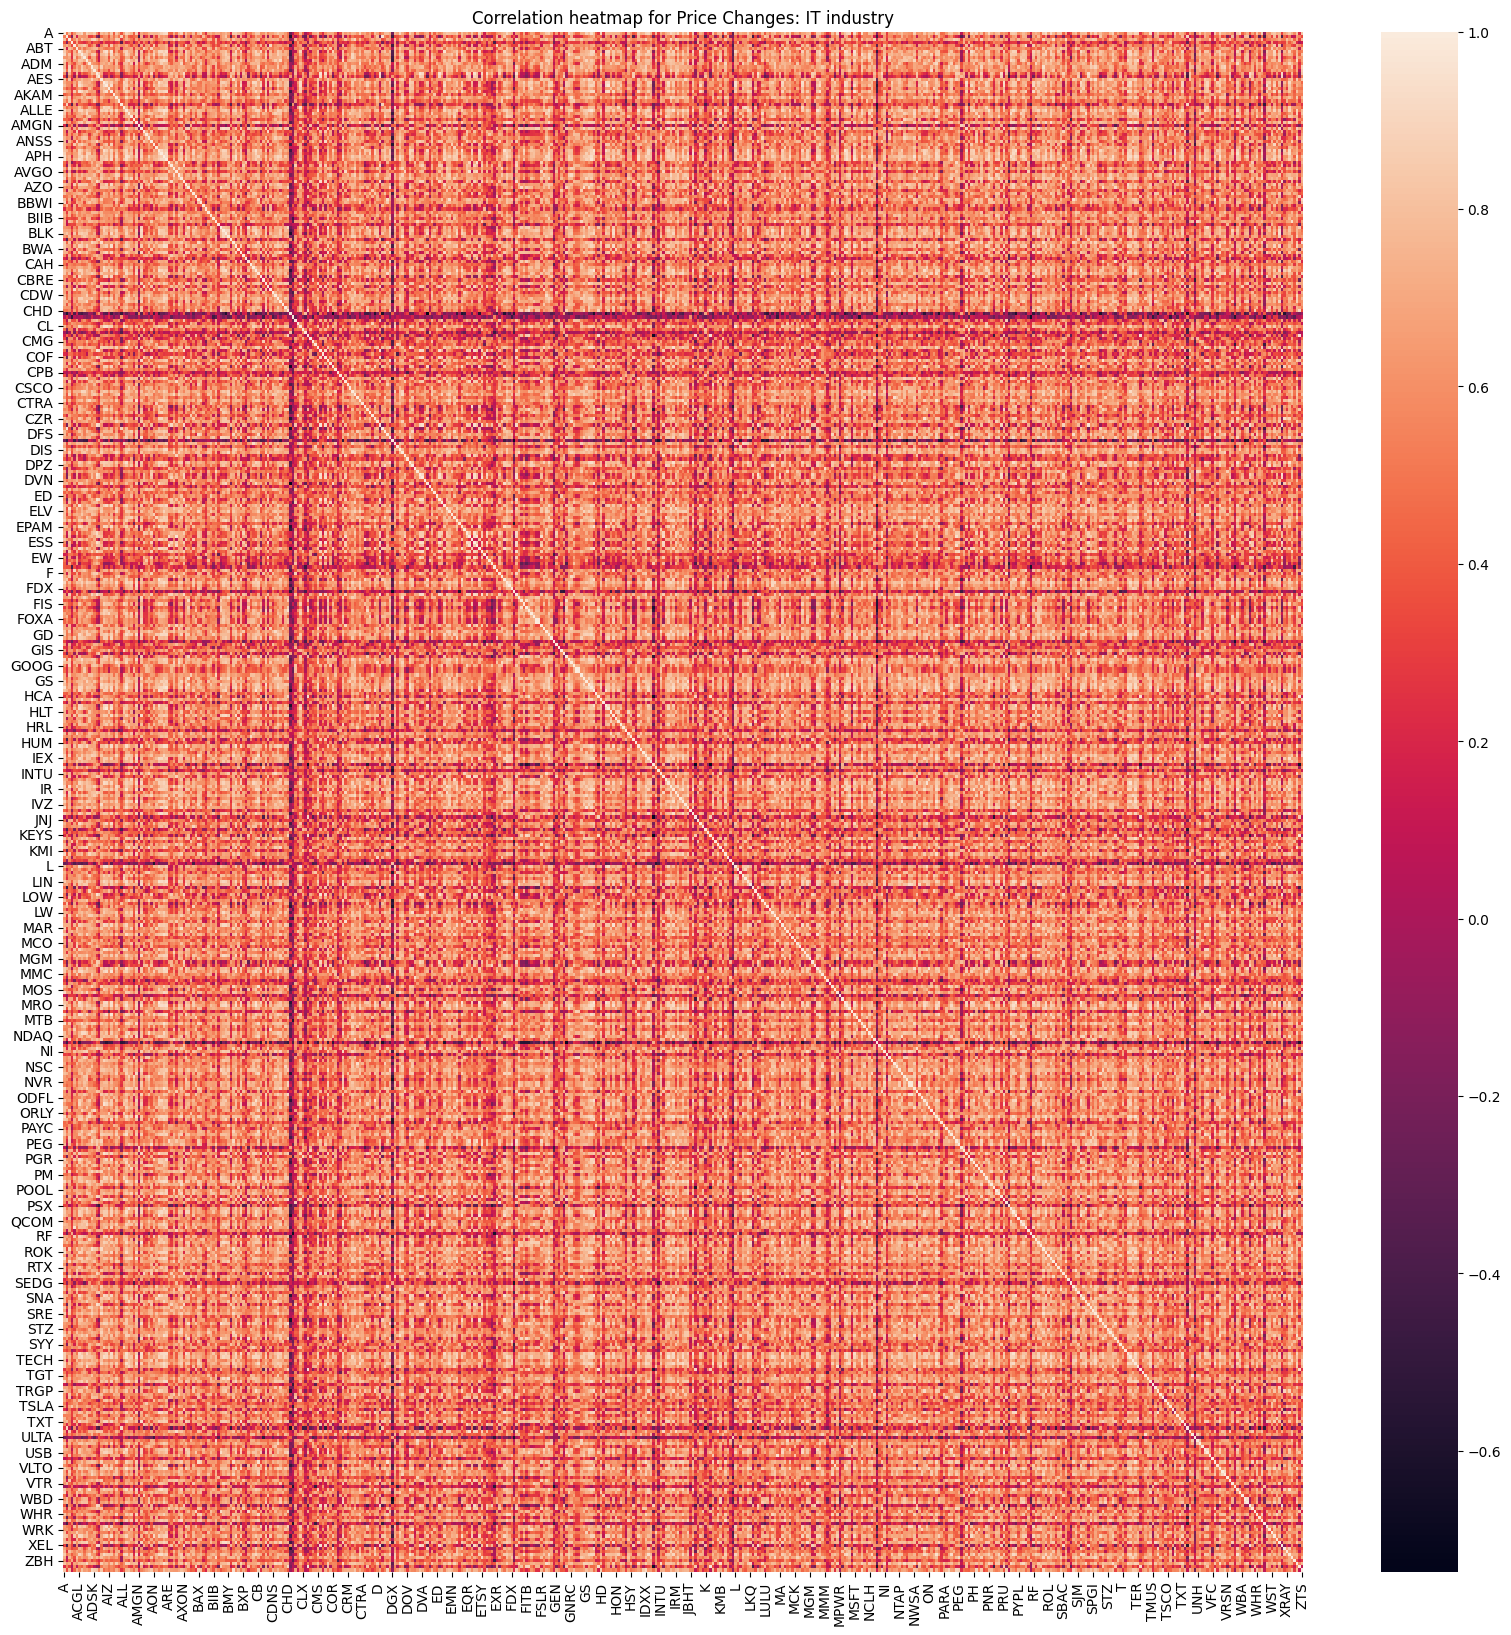

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(price_corr).set_title("Correlation heatmap for Price Changes: IT industry")

condition = condition.drop(columns= 'Industry', axis = 1)
df_price_it = condition.T
df_price_pct_it = df_price_it.pct_change()[1:]
#finds percent change between current price and prior
df_price_pct_it.head()

In [ ]:
#price_corr_it = df_price_pct_it.corr()
#price_corr_it

## Graphing Corr Matrix

In [ ]:
! pip3 install networkx
! pip3 install plotly

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import matplotlib as plt

In [ ]:
threshold = .95

links = price_corr.stack().reset_index()
links.columns = ['company1', 'company2', 'correlation']
#made price_corr go from company names as the row and column indeces to company1 being the first column header, company2 beign the second, and correlation as the third

#filtering out any correlations under the threshold that we will set and getting rid of the self loops in the nodes
links_filtered=links.loc[ (links['correlation'] > threshold) & (links['company1'] != links['company2']) ]
G=nx.from_pandas_edgelist(links_filtered, 'company1', 'company2', edge_attr = 'correlation')
nodes = list(G.nodes)
#df_company_names = pd.DataFrame(nodes, columns=['S&P Names'])
nx.set_node_attributes(G, dictionary, 'GICS Sector')

In [ ]:
edges = []
weights = []

# Iterate through the edges of the graph and extract 'correlation' as weights
#were making an edges list and a weights list
for edge in G.edges(data=True):
    source, target, weight = edge
    edges.append((source, target))
    weights.append(weight['correlation'])

In [ ]:
val_map = {
    'Materials': 'navy',
    'Consumer Staples': 'purple',
    'Energy': 'teal',
    'Real Estate': 'cyan',
    'Information Technology': 'dodgerblue',
    'Utilities': 'blue',
    'Health Care': 'indigo',
    'Industrials': 'royalblue',
    'Consumer Discretionary': 'skyblue',
    'Communication Services': 'midnightblue',
    'Financials': 'steelblue'
}

#list comprehension so cool
#for every node's sector theres a corresponding color
node_colors = [val_map.get(G.nodes[node]['GICS Sector']) for node in G.nodes()]

In [ ]:
from matplotlib import cm
plt.figure(figsize=(18, 14))


pos = nx.spring_layout(G, k=.7, seed =1234)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodes,
                       node_size=600,
                       node_color=node_colors,
                       alpha=.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = edges,
                       width=.8,
                       edge_color= weights,
                       edge_cmap = plt.cm.Blues,
                       alpha=0.9)


nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodes,nodes)),
                        font_color='white',
                        font_size = 10)

cmap = cm.ScalarMappable(cmap=cm.Blues, norm=plt.Normalize(vmin=threshold, vmax=1))


plt.box(False)
plt.show()
